In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import os
from glob import iglob

In [30]:
# Load results from the D analysis
D   = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-05-27/exac-synonymous/exac-synonymous_D_summary.txt",delimiter='\t')
D   = D.drop_duplicates(["sid","chain"])
KAD = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-05-27/exac-synonymous/exac-synonymous_KAD_summary.txt",delimiter='\t')
KAD = KAD.drop_duplicates(["sid","chain"])
KBD = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-05-27/exac-synonymous/exac-synonymous_KBD_summary.txt",delimiter='\t')
KBD = KBD.drop_duplicates(["sid","chain"])

In [31]:
print "Number of structures evaluated:",
print len(D)

print "\nD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(D[D["p"]<0.01]),len(D[D["p"]<0.01]) / float(len(D)))
# print "Perm Z-Score: (%4d) %.4f"%(len(D[D["z_p"]<0.01]),len(D[D["z_p"]<0.01]) / float(len(D)))

print "\nKAD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(KAD[KAD["p"]<0.01]),len(KAD[KAD["p"]<0.01]) / float(len(KAD)))
# print "Perm Z-Score: (%4d) %.4f"%(len(KAD[KAD["z_p"]<0.01]),len(KAD[KAD["z_p"]<0.01]) / float(len(KAD)))

print "\nKBD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(KBD[KBD["p"]<0.01]),len(KBD[KBD["p"]<0.01]) / float(len(KBD)))
# print "Perm Z-Score: (%4d) %.4f"%(len(KBD[KBD["z_p"]<0.01]),len(KBD[KBD["z_p"]<0.01]) / float(len(KBD)))

Number of structures evaluated: 4451

D Proportion with nominally significant unweighted p-values:
Permutation:  (  80) 0.0180

KAD Proportion with nominally significant unweighted p-values:
Permutation:  (  86) 0.0193

KBD Proportion with nominally significant unweighted p-values:
Permutation:  (  72) 0.0162


In [32]:
from qvalue import estimate
THRESH = 0.1

D['q'],    D_lam,  D_pi = estimate(  D['p'].values)
KAD['q'],KAD_lam,KAD_pi = estimate(KAD['p'].values)
KBD['q'],KBD_lam,KBD_pi = estimate(KBD['p'].values)

print "Proteins passing an FDR of %.0f%% for K_exac - K_synonymous"%(THRESH*100)
print "Permutation: %4d"%(D["q"]<THRESH).sum()

print "\nProteins passing an FDR of %.0f%% for K_exac - K*"%(THRESH*100)
print "Permutation: %4d"%(KAD["q"]<THRESH).sum()

print "\nProteins passing an FDR of %.0f%% for K_synonymous - K*"%(THRESH*100)
print "Permutation: %4d"%(KBD["q"]<THRESH).sum()

Proteins passing an FDR of 10% for K_exac - K_synonymous
Permutation:    5

Proteins passing an FDR of 10% for K_exac - K*
Permutation:    1

Proteins passing an FDR of 10% for K_synonymous - K*
Permutation:    2


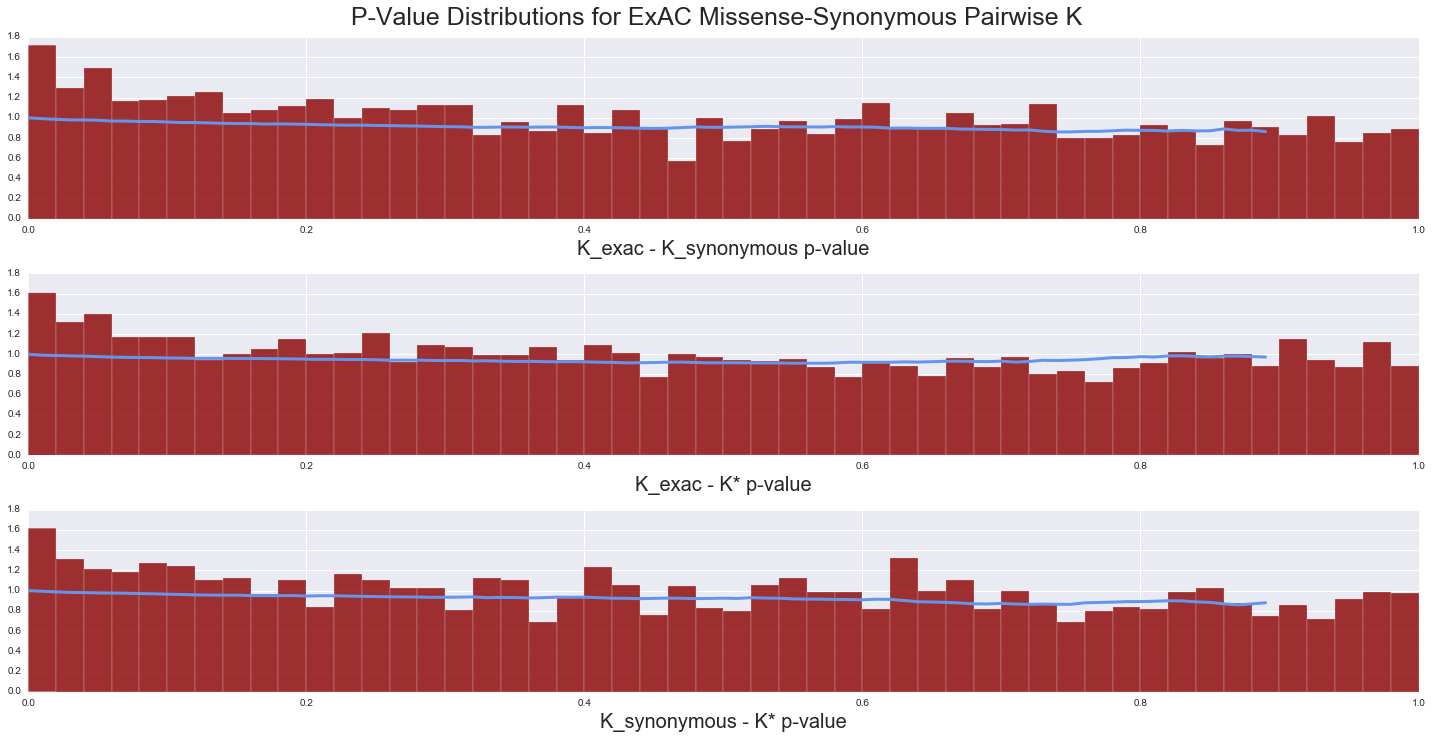

In [33]:
# P-Value Distributions
fig,ax = plt.subplots(3,1,figsize=(20,10))
plt.suptitle("P-Value Distributions for ExAC Missense-Synonymous Pairwise K",fontsize=25,y=1.02)

ax[0].set_xlabel("K_exac - K_synonymous p-value",fontsize=20)
# ax[0].hist(D["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[0].hist(D["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[0].plot(D_lam,D_pi,lw=3,c='cornflowerblue')

ax[1].set_xlabel("K_exac - K* p-value",fontsize=20)
# ax[1].hist(KAD["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[1].hist(KAD["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[1].plot(KAD_lam,KAD_pi,lw=3,c='cornflowerblue')

ax[2].set_xlabel("K_synonymous - K* p-value",fontsize=20)
# ax[2].hist(KBD["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[2].hist(KBD["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[2].plot(KBD_lam,KBD_pi,lw=3,c='cornflowerblue')

plt.tight_layout()
plt.show()

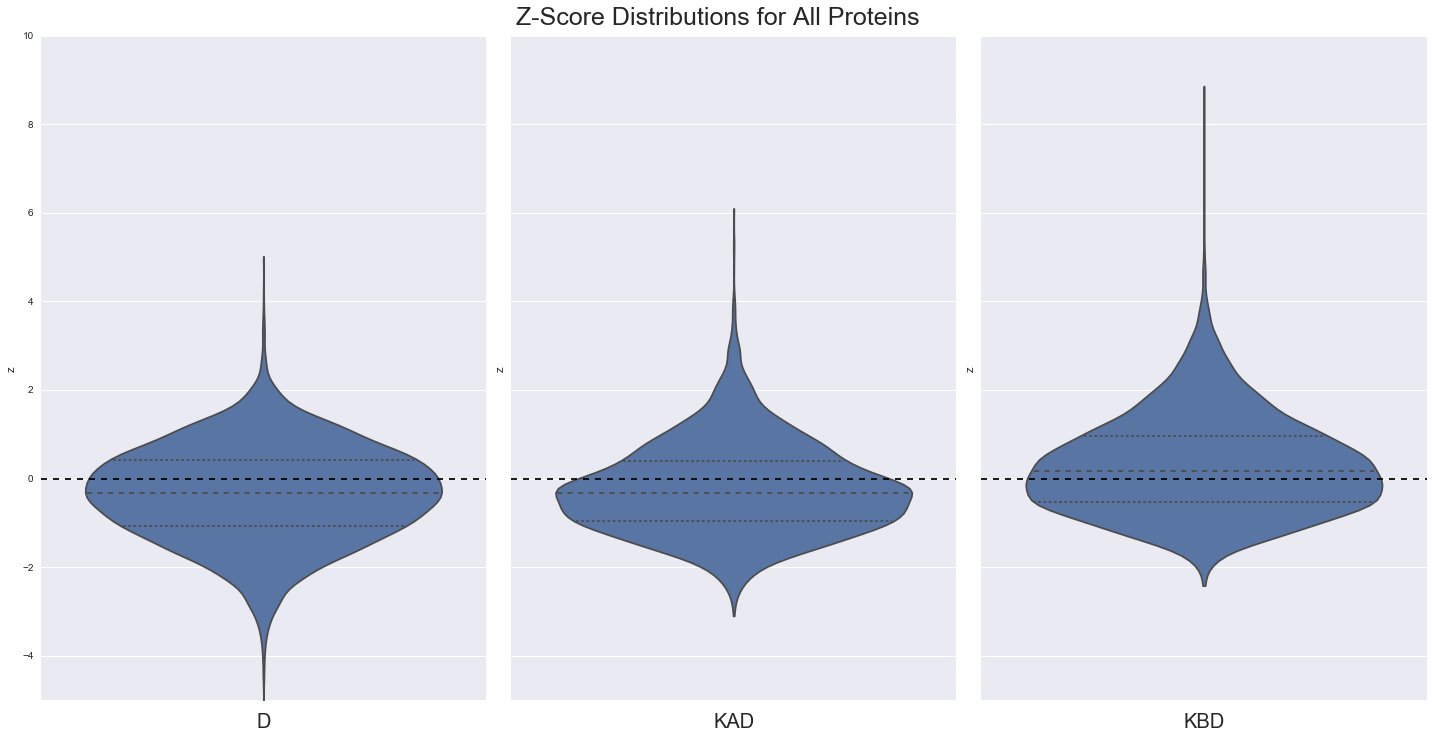

In [34]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D['z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.violinplot(KAD['z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.violinplot(KBD['z'],ax=ax[2],cut=0,orient='v',inner='quart')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,10])
plt.suptitle("Z-Score Distributions for All Proteins",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

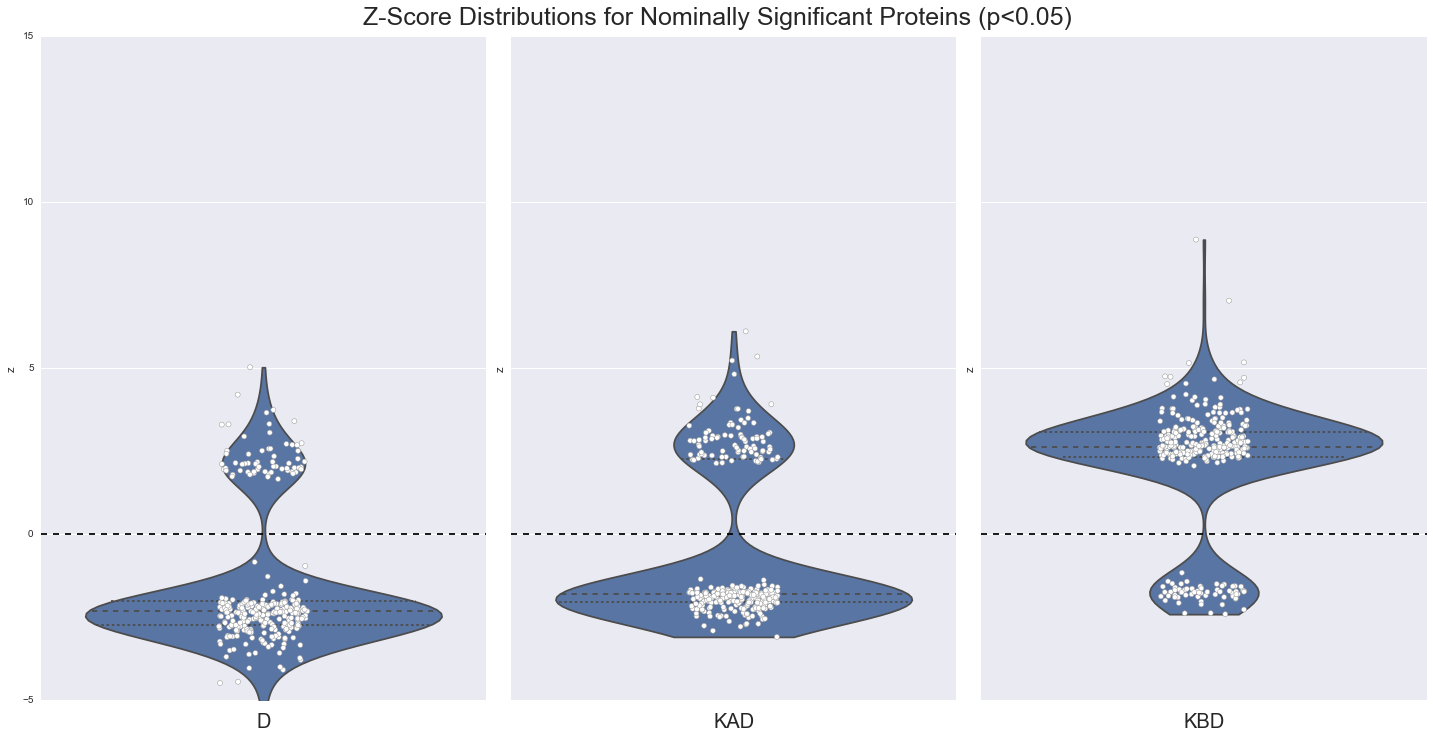

In [35]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[  D['p']<0.05,'z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.stripplot(   D.ix[  D['p']<0.05,'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['p']<0.05,'z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.stripplot( KAD.ix[KAD['p']<0.05,'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['p']<0.05,'z'],ax=ax[2],cut=0,orient='v',inner='quart')
sns.stripplot( KBD.ix[KBD['p']<0.05,'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,15])
plt.suptitle("Z-Score Distributions for Nominally Significant Proteins (p<0.05)",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

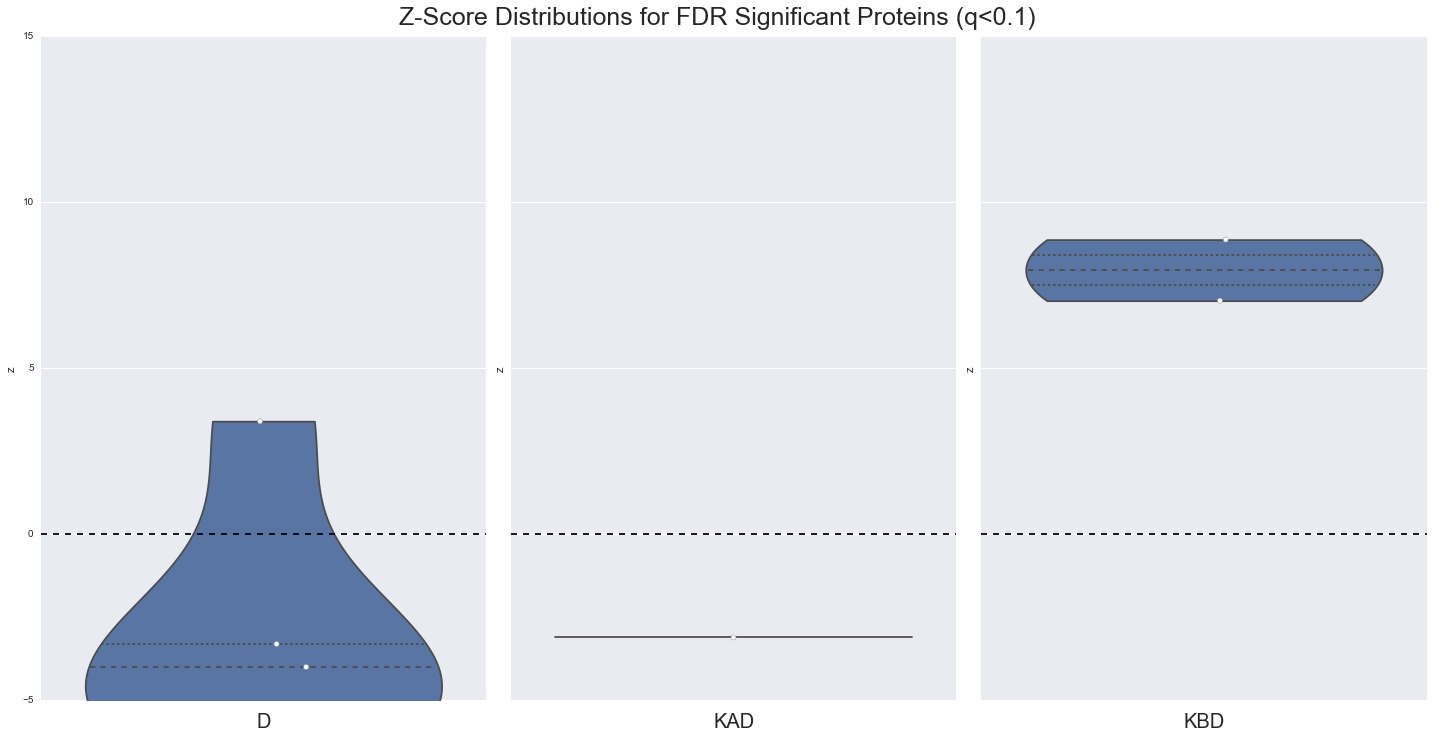

In [36]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[  D['q']<0.1,'z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.stripplot(   D.ix[  D['q']<0.1,'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['q']<0.1,'z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.stripplot( KAD.ix[KAD['q']<0.1,'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['q']<0.1,'z'],ax=ax[2],cut=0,orient='v',inner='quart')
sns.stripplot( KBD.ix[KBD['q']<0.1,'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,15])
plt.suptitle("Z-Score Distributions for FDR Significant Proteins (q<0.1)",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

In [37]:
# Identify the FDR-significant proteins
print "FDR-Significant Difference in Clustered-ness:"
print D.ix[D['q']<0.1,["sid","chain","z","q"]]

print "\nFDR-Significant Preference in Nonsynonymous Neighbors"
print KAD.ix[KAD['q']<0.1,["sid","chain","z","q"]]

print "\nFDR-Significant Preference in Synonymous Neighbors"
print KBD.ix[KBD['q']<0.1,["sid","chain","z","q"]]

FDR-Significant Difference in Clustered-ness:
       sid chain         z         q
851   3U9J     A -3.320091  0.092291
912   1RRJ     A -5.324552  0.038455
1894  2Y25     B -5.760527  0.038455
2798  3IHJ     A  3.393734  0.092291
4068  3BE2     A -4.011283  0.092291

FDR-Significant Preference in Nonsynonymous Neighbors
       sid chain         z         q
3269  1OZN     A -3.104982  0.086545

FDR-Significant Preference in Synonymous Neighbors
       sid chain         z         q
912   1RRJ     A  7.022921  0.039182
1894  2Y25     B  8.863533  0.039182


In [38]:
# Look for complete segregation
sigKAD = KAD.ix[(KAD['q']<0.1) & (KAD['z']>0),["sid","chain"]]
sigKBD = KBD.ix[(KBD['q']<0.1) & (KBD['z']>0),["sid","chain"]]
print "Proteins with co-occuring, significant K1-K* and K2-K*"
for t in set([(s,c) for _,s,c in sigKAD.itertuples()]).intersection([(s,c) for _,s,c in sigKBD.itertuples()]):
    print "%s\t%s"%t

Proteins with co-occuring, significant K1-K* and K2-K*


In [39]:
# Look for significant overlap
sigKAD = KAD.ix[(KAD['q']<0.1) & (KAD['z']<0),["sid","chain"]]
sigKBD = KBD.ix[(KBD['q']<0.1) & (KBD['z']<0),["sid","chain"]]
print "Proteins with co-occuring, significant K1-K* and K2-K*"
for t in set([(s,c) for _,s,c in sigKAD.itertuples()]).intersection([(s,c) for _,s,c in sigKBD.itertuples()]):
    print "%s\t%s"%t

Proteins with co-occuring, significant K1-K* and K2-K*


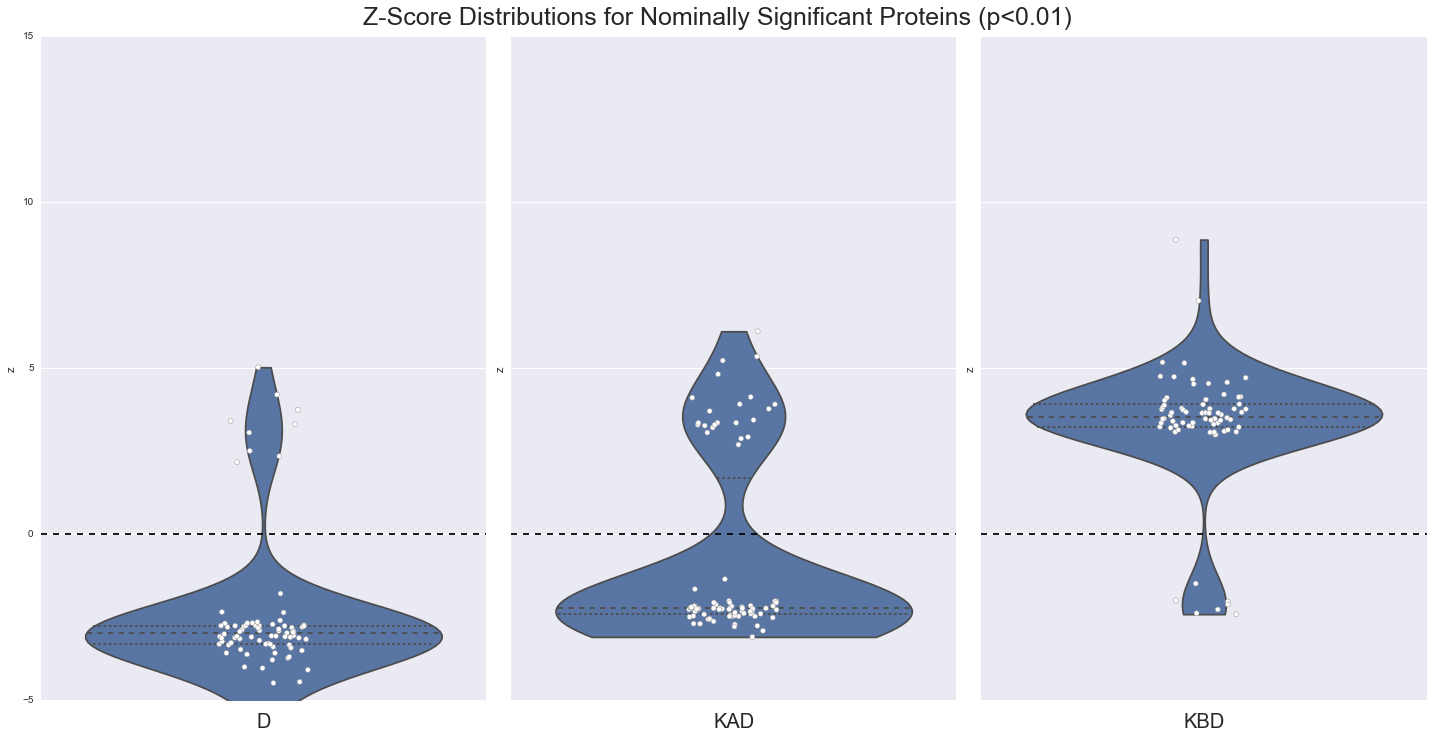

In [40]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[  D['p']<0.01,'z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.stripplot(   D.ix[  D['p']<0.01,'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['p']<0.01,'z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.stripplot( KAD.ix[KAD['p']<0.01,'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['p']<0.01,'z'],ax=ax[2],cut=0,orient='v',inner='quart')
sns.stripplot( KBD.ix[KBD['p']<0.01,'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,15])
plt.suptitle("Z-Score Distributions for Nominally Significant Proteins (p<0.01)",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

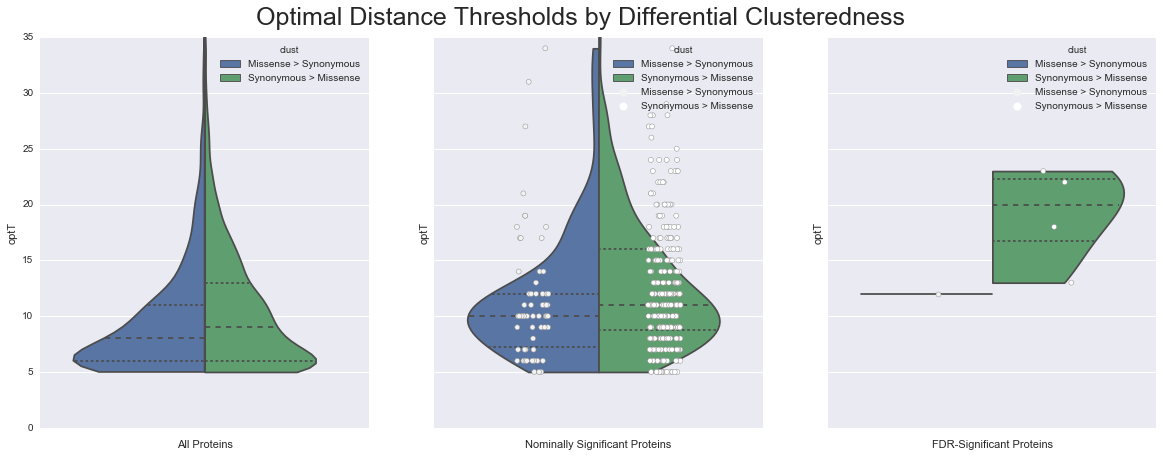

In [41]:
fig,ax = plt.subplots(1,3,figsize=(20,7),sharey=True)
df = D.copy()
ho = ['Missense > Synonymous','Synonymous > Missense']
df.ix[df['z']>0.,'clust'] = 'Missense > Synonymous'
df.ix[df['clust'].isnull(),'clust'] = 'Synonymous > Missense'
df[''] = ''
plt.suptitle("Optimal Distance Thresholds by Differential Clusteredness",fontsize=25,y=.96)
sns.violinplot(x='',y='optT',hue='clust',data=df,split=True,cut=0,ax=ax[0],inner='quart',hue_order=ho)
ax[0].set_xlabel("All Proteins")
sns.violinplot(x='',y='optT',hue='clust',data=df[df['p']<0.05],split=True,cut=0,ax=ax[1],inner='quart',hue_order=ho)
sns.stripplot(x='',y='optT',hue='clust',data=df[df['p']<0.05],split=True,orient='v',jitter=True,lw=0.5,color='white',hue_order=ho,ax=ax[1])
ax[1].set_xlabel("Nominally Significant Proteins")
sns.violinplot(x='',y='optT',hue='clust',data=df[df['q']<0.1],split=True,cut=0,ax=ax[2],inner='quart',hue_order=ho)
sns.stripplot(x='',y='optT',hue='clust',data=df[df['q']<0.1],split=True,orient='v',jitter=True,lw=0.5,color='white',hue_order=ho,ax=ax[2])
ax[2].set_xlabel("FDR-Significant Proteins")
plt.ylim([0,35])
plt.show()